# I. 하이퍼 파라미터 최적화: CV

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#Loading iris dataset from sklearn
iris = load_iris()

#independent feautres
X = iris.data

# target features
y = iris.target

In [ ]:
#import XGboost
from xgboost import XGBClassifier

#Defining XGB Classification model
clf = XGBClassifier()

### 1.Grid SearchCV


In [ ]:
#Importing packages from sklearn

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],                                 #4개 4개 16가지
    #"reg_lambda":[.01,.1,.5] # 무시하자
}

#declaring GridSearchCV model

model = model_selection.GridSearchCV(
    estimator = clf,  #분류모형
    param_grid = param_grid,  #파라미터 범위
    scoring = 'accuracy',  #정분류율
    verbose = 10,
    n_jobs = 1,          # 계산하는 코어의 수 지정, 병렬 처리
    cv = 5         # 5-fold CV
) # 4 * 4 * 5 번 계산

#fitting values to the gridsearchcv model

model.fit(X,y)
#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_) # best 모형
#printing the best score
print(model.best_score_)

### 2. RandomizedSearchCV



In [ ]:
#defining a set of values as a dictionary for hyperparameters
param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    #"reg_lambda":[.01,.1,.5]
}

#declaring RandomizedSearchCV model
model = model_selection.RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5,
    n_iter=10
)

#fitting values to the RandomizedSearchCV model
model.fit(X,y)

#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

In [ ]:
#iris 데이터에 대해서 AdaBoostClassifier()로 분류를 하세요
#GridsearchCV를 적용하세요
#10 - fold, n-estimators= 80, 90, 100, 110, 120, learning_rate=0.3, 0.6, 1.0
#best score, best param출력

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
param_grid = {
    "n_estimators":[80,90,100,110,120], "learning_rate":[0.3, 0.6, 1.0]}
model = model_selection.GridSearchCV(
    estimator = clf,  #분류모형
    param_grid = param_grid,  #파라미터 범위
    scoring = 'accuracy',  #정분류율
    verbose = 10,        # 이걸 0으로하면 결과만 보여준다
    n_jobs = 1,          # 계산하는 코어의 수 지정, 병렬 처리
    cv = 10
)
model.fit(X,y)
print(model.best_params_)
print(model.best_score_)
model.best_estimator_  #모형

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 1/10; 1/15] END learning_rate=0.3, n_estimators=80;, score=1.000 total time=   0.2s
[CV 2/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 2/10; 1/15] END learning_rate=0.3, n_estimators=80;, score=0.933 total time=   0.2s
[CV 3/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 3/10; 1/15] END learning_rate=0.3, n_estimators=80;, score=1.000 total time=   0.2s
[CV 4/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 4/10; 1/15] END learning_rate=0.3, n_estimators=80;, score=0.933 total time=   0.1s
[CV 5/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 5/10; 1/15] END learning_rate=0.3, n_estimators=80;, score=0.933 total time=   0.1s
[CV 6/10; 1/15] START learning_rate=0.3, n_estimators=80........................
[CV 6/10; 1

AdaBoostClassifier(n_estimators=90)

# II. Boosting 비교

###Gradient boosting
- 앙상블 기법
- DT를 Boost하여 오차의 Gradient를 최소화
- Tree 모형을 기반으로 하는 앙상블
- 미분 가능한 loss 함수와 GD 최적화 알고리즘을 사용(=ANN)
- GBM의 하이퍼파라미터
 - The number of trees or estimators in the model.
 - The learning rate of the model.
 - The row and column sampling rate for stochastic models.
 - The maximum tree depth.
 - The minimum tree weight.
 - The regularization terms alpha and lambda.

 - loss : 경사 하강법에서 사용할 비용 함수. 기본값 'devidence'

 - learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 기본값은  0.1
  - weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - 0 ~ 1 사이의 값
  - 작을 경우, 예측 성능이 높아질 수 있으나 많은 week learner가 순차적인 반복이 필요해 수행시간이 길어지고 local optima에 빠질 수 있음
  - 너무 큰 값을 설정하는 경우, 최적값을 못찰을 수 있어 성능이 떨어질 가능성이 있으나, 시간은 단축
  - learning_rate은 n_estimator와 상호 보완적으로 활용

 - n_estimators: weak learner의 개수이며,기본값은 100
  - weak learner가 많으면 성능 개선이 있지만 많은 시간 소요

- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율, 기본값은 1이며, 전체 데이터를 기반으로 학습함. 1보다 작은 값을 설정해서 과적합을 완화시킬 수 있음

### 0. Adaboosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# binary.csv 파일, 파티셔닝 8:2
binary = pd.read_csv("binary.csv")
y = binary.admit
X = binary.drop("admit", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y)
boost = AdaBoostClassifier().fit( X_train, y_train)
rf = RandomForestClassifier().fit( X_train, y_train)

print( boost.score( X_test, y_test) )
rf.score( X_test, y_test)

0.6625


0.7625

### 1. Gradient Boosting




In [ ]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

In [ ]:
#피팅
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
model = GradientBoostingClassifier(learning_rate=0.05,
                                   n_estimators=200).fit(X_train, y_train)
model2 = AdaBoostClassifier(learning_rate=0.05,
                                   n_estimators=200).fit( X_train, y_train)
model3 = RandomForestClassifier().fit( X_train, y_train)
model4 = XGBClassifier().fit( X_train, y_train)
model5 = LGBMClassifier().fit( X_train, y_train)

[LightGBM] [Info] Number of positive: 96, number of negative: 224
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
print(model.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
print(model4.score(X_test, y_test))
print(model5.score(X_test, y_test))

0.6125
0.625
0.6625
0.5375
0.6


In [ ]:
# k-foldCV
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.696 (0.075)


In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xparam = {"learning_rate":[0.05, 0.1, 0.15], "n_estimators":[50,100,150]}
xgb_cv = GridSearchCV( XGBClassifier(), xparam ).fit( X_train, y_train)

In [ ]:
best = xgb_cv.best_estimator_ #cv결과 중 제일 좋은 모형
best.score(X_test, y_test)

0.6

### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost
- XGBClassifier와 XGBregressor 제공


In [ ]:
# 분류, xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = XGBClassifier()
model.fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Accuracy: 0.933 (0.022)
Prediction: 1


### 4.Gradient Boosting With LightGBM
- Light Gradient Boosted Machine
- MS에 의해 개발, 효율성이 강조된 GBM
- 설치되어 있으며 필요 시 !pip install lightgbm
- LGBMClassifier , LGBMRegressor classes.


In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = LGBMClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)



Accuracy: 0.934 (0.021)
[LightGBM] [Info] Number of positive: 501, number of negative: 499
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501000 -> initscore=0.004000
[LightGBM] [Info] Start training from score 0.004000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Prediction: 1


### 5.Gradient Boosting with CatBoost
- CatBoost는 Yandex가 개발한 라이브러리
- 효율적으로 계산하여 속도 개선
- 범주형 X변수에 대해 잘 작동: Category Gradient Boosting
- 설치 안되어 있으므로, 다음을 이용해서 설치
- !pip install catboost
- CatBoostClassifier , CatBoostRegressor


In [ ]:
!pip install catboost

In [ ]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)


Accuracy: 0.925 (0.025)
Prediction: 1


Papers
-	Stochastic Gradient Boosting, 2002.
-	XGBoost: A Scalable Tree Boosting System, 2016.
-	LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.
-	CatBoost: gradient boosting with categorical features support, 2017.


# III. 연습
1. sms.csv를 읽으셔서 type을 target으로 하는 분류 모형
- 파티션 8:2 / 모형: XGBoost, RandomForest
- 상대적으로 좋은 성능의 모형을 gridsearch
- 테스트셋 예측->classification_report출력

In [ ]:
#1. sms.csv
sms = pd.read_csv("sms.csv")
sms.dropna(inplace=True)
X = sms.drop("type", axis=1)
y = sms.type
X_train,X_test,y_train, y_test = train_test_split( X,y,
                                                  test_size=0.2, stratify = y)

In [ ]:
model1 = XGBClassifier().fit(X_train, y_train)
model2 = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
print(model1.score(X_train,y_train))
print(model2.score(X_train,y_train))

0.9484189280107648
0.9786947746131419


In [ ]:
cv1 = GridSearchCV( RandomForestClassifier(), {"n_estimators":[250,300,350],
                                               "max_depth":[2,3,4]}).fit(X_train, y_train)
best1 = cv1.best_estimator_

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, best1.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       966
           1       1.00      0.07      0.14       149

    accuracy                           0.88      1115
   macro avg       0.94      0.54      0.54      1115
weighted avg       0.89      0.88      0.83      1115



2. train.csv를 읽으셔서 label을 target으로 하는 분류 모형
- 모형: XGBoost, RandomForest
- XGBoost, RandomForest 모형들을 gridsearch
- test.csv를 읽은 테스트셋에 대해서 예측->classification_report출력으로 두 모형을 비교

In [ ]:
#2. train.csv
train = pd.read_csv("train.csv")
train.dropna(inplace=True)
X_train = train.drop("label", axis=1)
y_train = train.label

test = pd.read_csv("test.csv")
X_test = test.drop("label", axis=1)
y_test = test.label

In [ ]:
X_train.shape

(5000, 784)

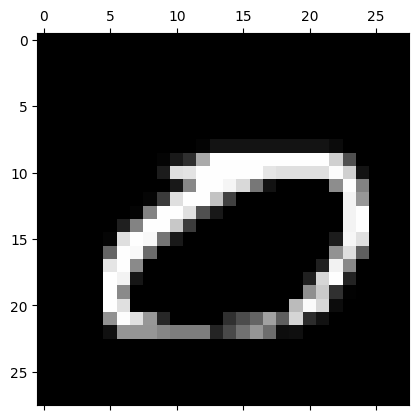

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(X_train.values[0].reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [ ]:
cv3 = GridSearchCV(XGBClassifier(), {"n_estimators":[100], "learning_rate":[0.1]},
                   verbose=4, cv=2).fit(X_train, y_train)
best3 = cv3.best_estimator_
print( classification_report(y_test, best3.predict(X_test)) )

cv4 = GridSearchCV(RandomForestClassifier(), {"n_estimators":[200], "max_depth":[3]},
                   verbose=4,cv=2).fit(X_train, y_train)
best4 = cv4.best_estimator_
print( classification_report(y_test, best4.predict(X_test)) )

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END learning_rate=0.1, n_estimators=100;, score=0.910 total time= 1.3min
[CV 2/2] END learning_rate=0.1, n_estimators=100;, score=0.911 total time= 1.1min
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.96      0.98      0.97       100
           2       0.92      0.96      0.94       100
           3       0.96      0.90      0.93       100
           4       0.96      0.94      0.95       100
           5       0.93      0.96      0.95       100
           6       0.95      0.95      0.95       100
           7       0.95      0.95      0.95       100
           8       0.96      0.93      0.94       100
           9       0.90      0.94      0.92       100

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Fitting 2 folds fo

In [ ]:
# 10개값을 갖는 한 개의 X 샘플에 대한 범주 예측
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1
